In [91]:
import re
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

warnings.filterwarnings("ignore")

In [92]:
primaryColor = '#15517e'
secondaryColor = '#4682b4'
thirdColor = '#5c5c5c'
sns.set(style='white', font='SimHei', font_scale=2)

Data - 歷年國內主要觀光遊憩據點遊客人數月別統計

In [93]:
touristSpotData = pd.read_csv('./data/TouristSpotStatistics.csv')

In [94]:
touristSpotData.head(2)

,year,type,name,touristSopt,city,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,totalCount
0,2012,國家公園,陽明山國家公園,陽明山遊客中心,臺北市,12187.0,18612.0,18580.0,13329.0,14179.0,11397.0,16000.0,11791.0,10469.0,11515.0,6896.0,9631.0,154586
1,2012,國家公園,陽明山國家公園,陽明書屋,臺北市,2597.0,3617.0,5221.0,4317.0,3497.0,2815.0,3005.0,2497.0,2764.0,3701.0,2863.0,2983.0,39877


In [95]:
taipeiTouristSpotData = touristSpotData[touristSpotData['city'] == '臺北市']
taipeiTouristSpotData['touristSopt'] = taipeiTouristSpotData['touristSopt'].map(lambda x: x.replace('台北', '臺北'))

Tourist Spot count each year

In [96]:
taipeiTouristSpotsCount = taipeiTouristSpotData.groupby(['year'], as_index= False).agg(spotCount = ("touristSopt", pd.Series.nunique))
spot_2012 = taipeiTouristSpotData[taipeiTouristSpotData['year'] == 2015]['touristSopt'].values
spot_2016 = taipeiTouristSpotData[taipeiTouristSpotData['year'] == 2017]['touristSopt'].values
spot_2018 = taipeiTouristSpotData[taipeiTouristSpotData['year'] == 2021]['touristSopt'].values
taipeiTouristSpotsCount

,year,spotCount
0,2012,28
1,2013,28
2,2014,28
3,2015,28
4,2016,32
5,2017,32
6,2018,35
7,2019,35
8,2020,35
9,2021,35


new tourist spots

In [97]:
print("New tourist spots after 2016:", set(spot_2016) - set(spot_2012))
print("New tourist spots after 2018:", set(spot_2018) - set(spot_2016))

New tourist spots after 2016: {'臺北市立兒童新樂園', '國立臺灣博物館', '華山1914文化創意產業園區', '臺北植物園'}
New tourist spots after 2018: {'冷水坑', '松山文創園區', '國立國父紀念館', '白石湖吊橋', '臺北市立美術館', '擎天崗', '臺北市立動物園', '臺北市立天文科學教育館', '圓山別莊'}


In [98]:
taipeiTouristSpotData[taipeiTouristSpotData['year'] == 2021]['touristSopt'].values

array(['陽明山遊客中心', '陽明書屋', '陽明公園', '大屯遊憩區', '龍鳳谷遊憩區', '小油坑遊憩區', '冷水坑',
       '擎天崗', '國立故宮博物院', '臺北市立美術館', '國立歷史博物館', '國立臺灣科學教育館', '臺北市立天文科學教育館',
       '國立國父紀念館', '國立中正紀念堂', '臺北探索館', '臺北當代藝術館', '北投溫泉博物館', '圓山別莊',
       '凱達格蘭文化館', '國立臺灣博物館', '國民革命忠烈祠', '國立臺灣藝術教育館', '臺北市立動物園', '士林官邸公園',
       '臺北自來水園區', '關渡自然公園', '美麗華摩天輪', '臺北101景觀台', '臺北市孔廟', '臺北市立兒童新樂園',
       '臺北植物園', '華山1914文化創意產業園區', '松山文創園區', '白石湖吊橋'], dtype=object)

tourist spots count each year

Text(0.5, 1.0, 'Tourist Spots Count')

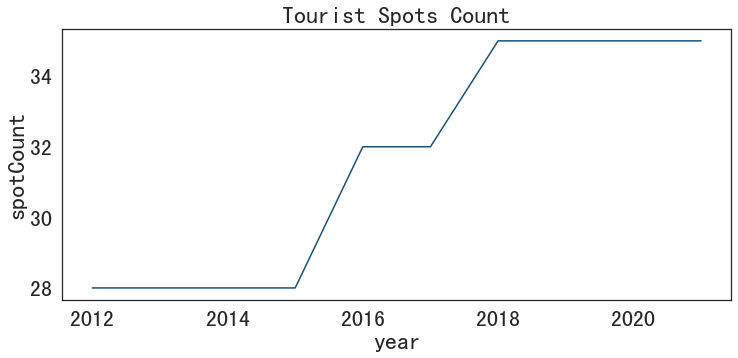

In [99]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(data = taipeiTouristSpotsCount, x = "year", y = "spotCount", color = primaryColor).set_title("Tourist Spots Count")
# plt.savefig(f"./output/NumberOfTouristSpot.png", dpi=1200, facecolor=fig.get_facecolor())

In [100]:
taipeiTouristSpotData_2021 = taipeiTouristSpotData[taipeiTouristSpotData['year'] == 2021]
taipeiTypeCount_2021 = taipeiTouristSpotData_2021['type'].value_counts()

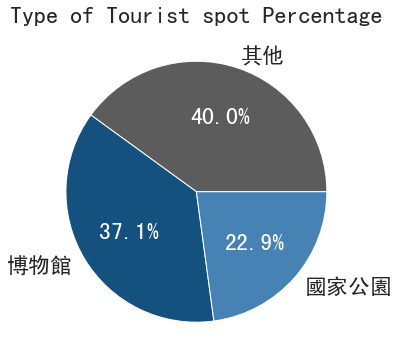

In [117]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 6))
_, text, autotexts = ax1.pie(taipeiTypeCount_2021.values, labels = taipeiTypeCount_2021.keys(), colors=[thirdColor, primaryColor, secondaryColor], autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')
ax1.set_title("Type of Tourist spot Percentage")
# plt.savefig(f"./output/touristSpotType.png", dpi=1200, facecolor=fig.get_facecolor())

Visisting Count

(0.0, 58237065.0)

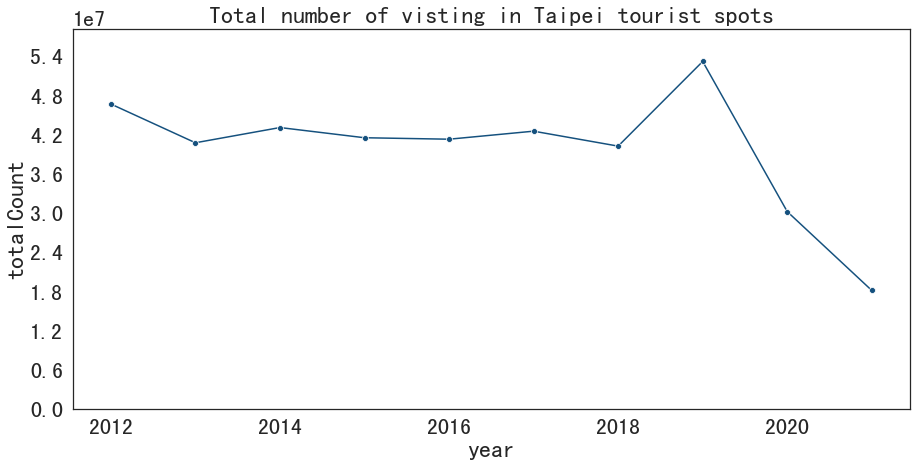

In [102]:
taipeiTouristTotalCount = taipeiTouristSpotData.groupby(['year'], as_index=False).agg(totalCount=("totalCount", "sum"))
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
sns.lineplot(data = taipeiTouristTotalCount, x = "year", y = "totalCount", marker='o', color = primaryColor).set_title("Total number of visting in Taipei tourist spots")
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylim(0, max(taipeiTouristTotalCount["totalCount"])+0.5e7)
# plt.savefig(f"./output/totalVisitingCount_Year.png", dpi=1200, facecolor=fig.get_facecolor())

Top 10 tourist spots in Taipei

In [103]:
top10HotTouristSpot = taipeiTouristSpotData_2021.sort_values('totalCount', ascending = False).head(10)[['touristSopt', 'totalCount']]
taipeiTouristSpotData_2021.sort_values('totalCount', ascending = False).head(10)

,year,type,name,touristSopt,city,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,totalCount
3035,2021,其他,-,松山文創園區,臺北市,537408.0,489627.0,510866.0,513970.0,255314.0,90596.0,123927.0,233779.0,270165.0,373248.0,NaN,NaN,3398900
3034,2021,其他,-,華山1914文化創意產業園區,臺北市,201037.0,364808.0,286081.0,318797.0,71458.0,0.0,63987.0,64686.0,92284.0,183332.0,NaN,NaN,1646470
2960,2021,其他,-,臺北市立動物園,臺北市,218062.0,292531.0,202395.0,262885.0,74900.0,0.0,0.0,90490.0,78107.0,143080.0,NaN,NaN,1362450
2744,2021,國家公園,陽明山國家公園,陽明公園,臺北市,14994.0,609339.0,572943.0,12322.0,3022.0,18052.0,9750.0,14460.0,13520.0,6308.0,NaN,NaN,1274710
2961,2021,其他,-,士林官邸公園,臺北市,101987.0,407032.0,352623.0,110612.0,29471.0,9553.0,11801.0,19613.0,15698.0,30449.0,NaN,NaN,1088839
2910,2021,博物館,-,國立歷史博物館,臺北市,173973.0,266892.0,120588.0,151745.0,51642.0,0.0,2815.0,56860.0,86984.0,167844.0,NaN,NaN,1079343
2913,2021,博物館,-,國立國父紀念館,臺北市,169615.0,142825.0,149890.0,169285.0,98845.0,14595.0,25375.0,42300.0,74500.0,110240.0,NaN,NaN,997470
3032,2021,其他,-,臺北植物園,臺北市,142986.0,132955.0,177340.0,171243.0,74947.0,0.0,16143.0,38825.0,49698.0,71915.0,NaN,NaN,876052
2911,2021,博物館,-,國立臺灣科學教育館,臺北市,121528.0,171623.0,104862.0,113748.0,65807.0,22520.0,40689.0,32977.0,45210.0,101304.0,NaN,NaN,820268
3031,2021,其他,-,臺北市立兒童新樂園,臺北市,113812.0,157701.0,104157.0,156444.0,39592.0,0.0,0.0,42933.0,36838.0,70285.0,NaN,NaN,721762


(0.0, 58237065.0)

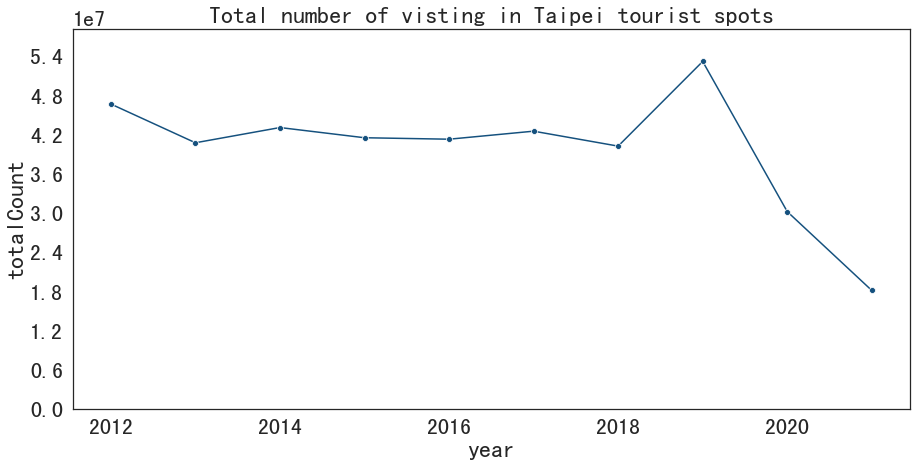

In [104]:
taipeiTouristTotalCount = taipeiTouristSpotData.groupby(['year'], as_index=False).agg(totalCount=("totalCount", "sum"))
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
sns.lineplot(data = taipeiTouristTotalCount, x = "year", y = "totalCount", marker='o', color = primaryColor).set_title("Total number of visting in Taipei tourist spots")
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylim(0, max(taipeiTouristTotalCount["totalCount"])+0.5e7)
# plt.savefig(f"./output/totalVisitingCount_Year.png", dpi=1200, facecolor=fig.get_facecolor())

Top 10 tourist sites & totalCount History

Text(0.5, 1.0, '')

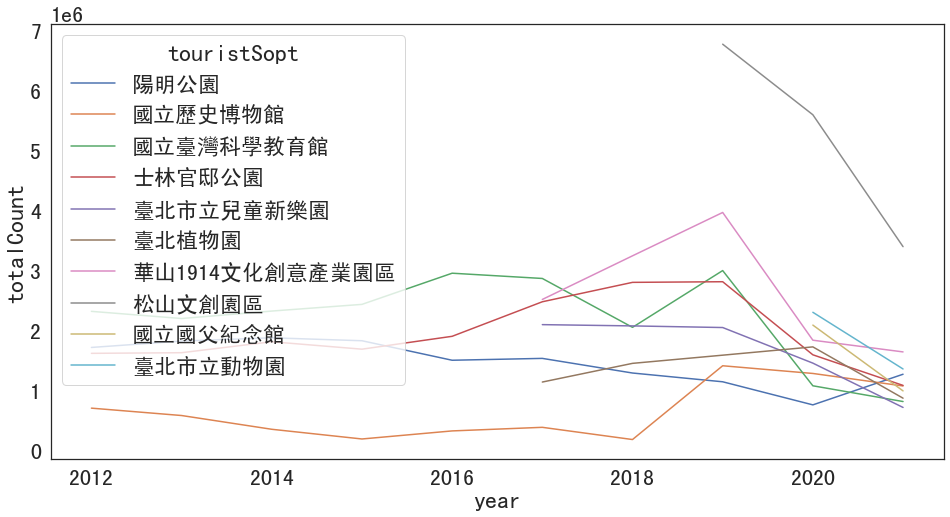

In [106]:
hotTouristSpots = list(top10HotTouristSpot['touristSopt'].values)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 8))
sns.lineplot(data = taipeiTouristSpotData[(taipeiTouristSpotData['touristSopt'].isin(hotTouristSpots)) & (taipeiTouristSpotData['totalCount']> 0)], x = "year", y = "totalCount", hue="touristSopt").set_title("")

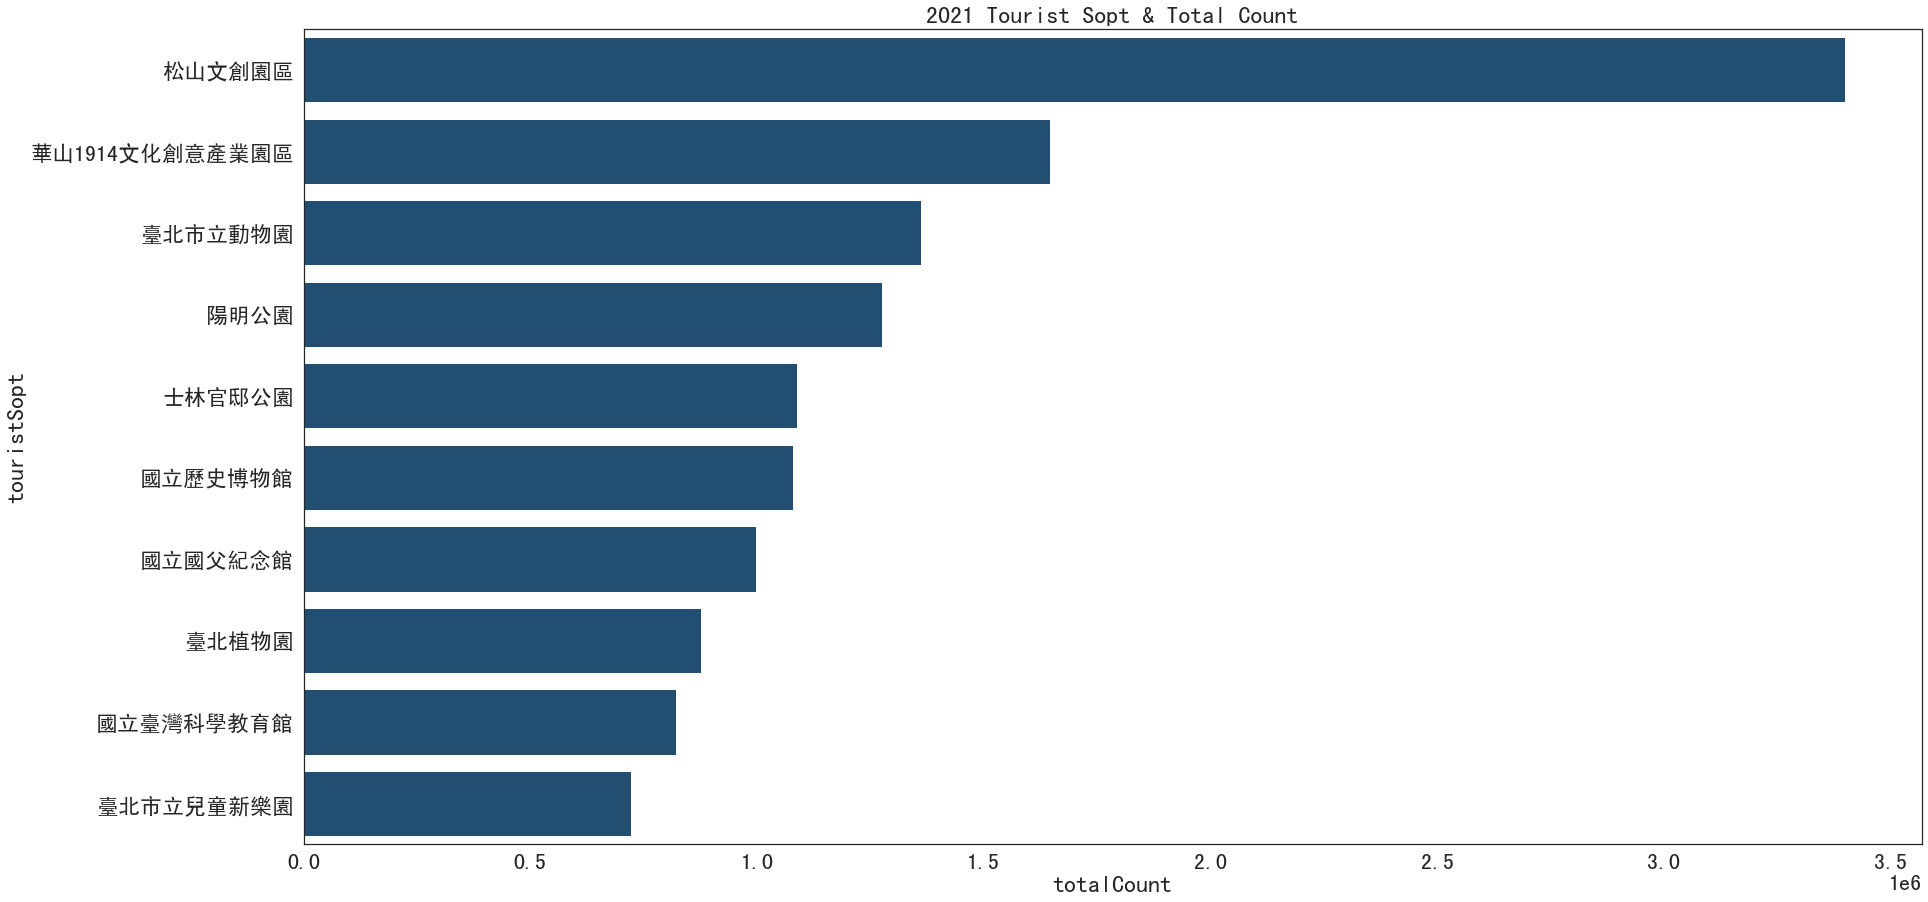

In [108]:
fig, (ax1) = plt.subplots(1, 1, figsize=(29, 15))
sns.barplot(data = top10HotTouristSpot, y = "touristSopt", x = "totalCount", color = primaryColor).set_title("2021 Tourist Sopt & Total Count")
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig(f"./output/Top10TouristSpotTotalCount.png", dpi=1200, facecolor=fig.get_facecolor())